to minimize loss from the bank’s perspective.
Bank (by loan manager) needs to decide who will get loan approval based on the applicants’ demographic and socio-economic profiles. The data set consists of 20 variables and classification on applicant whether he/she has good or bad credit risk. 
The predictive model will provide guidance in making loan approval decision on prospective applicants based on clients’ profiles.
From the given data set, perform the task using decision tree.
What are your findings?
Plot and interpret the tree.
Prune the tree from the previous result.
Does the pruned tree show any performance improvement?
What attributes are found in the pruned tree?

Conclude your finding.

From the given data set, perform the task using random forest.
Summarize your finding.
Compare results of decision tree and random forest.

In [64]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [65]:
germany = pd.read_csv('/Users/alisha/Downloads/assign_wk4/german_credit_risk.csv')
germany.head(10)

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [71]:
X = germany.drop(columns=['Number.Liable'])
y = germany['Number.Liable']
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(750, 20)
(250, 20)


In [74]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

In [76]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

ValueError: could not convert string to float: 'A14'

In [77]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

NameError: name 'y_train_pred' is not defined

In [78]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

ValueError: could not convert string to float: 'A14'

In [35]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Checking.Account   1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit.Hist        1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Credit.Amount      1000 non-null   int64 
 5   Saving.Account     1000 non-null   object
 6   Employmnet         1000 non-null   object
 7   Disposable.Income  1000 non-null   int64 
 8   Personal.Status    1000 non-null   object
 9   Other.Debtors      1000 non-null   object
 10  Present.Residence  1000 non-null   int64 
 11  Property           1000 non-null   object
 12  Age                1000 non-null   int64 
 13  Other.Loans        1000 non-null   object
 14  Housing            1000 non-null   object
 15  Existing.Credits   1000 non-null   int64 
 16  Job                1000 non-null   object
 

In [36]:
germany.isnull().sum()

Checking.Account     0
Duration             0
Credit.Hist          0
Purpose              0
Credit.Amount        0
Saving.Account       0
Employmnet           0
Disposable.Income    0
Personal.Status      0
Other.Debtors        0
Present.Residence    0
Property             0
Age                  0
Other.Loans          0
Housing              0
Existing.Credits     0
Job                  0
Number.Liable        0
Telephone            0
Foreign.Worker       0
Cost.Matrix          0
dtype: int64

This shows that there is no any missing value. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

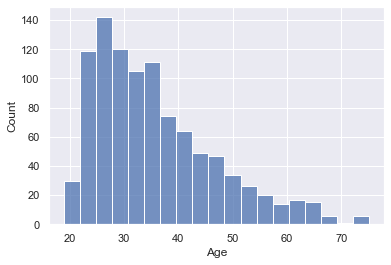

In [37]:
import seaborn as sn
sn.histplot(germany.Age)

This histogram shows that the data is slightly skewed towards right. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

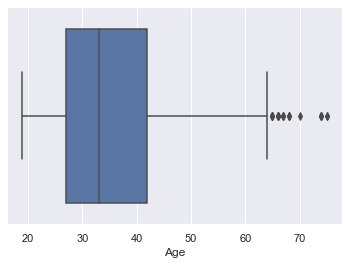

In [38]:
sn.boxplot(germany.Age)

Same with these outliers, they are towards the right side. 

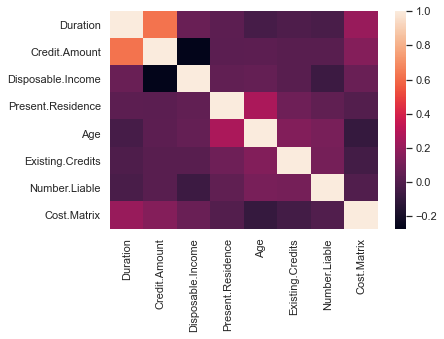

In [39]:
_ = sns.heatmap(germany.corr())

In [43]:
X = germany.drop(columns=['Cost.Matrix'])
y = germany['Cost.Matrix']
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(750, 20)
(250, 20)


In [45]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

ValueError: could not convert string to float: 'A14'

In [30]:
plt.figure(figsize=(20,20))
features = germany.columns
classes = ['Approved','Not Approved']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1440x1440 with 0 Axes>